In [1]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [2]:
figsize = (15,8)
fontsize = 15
titlesize = 17

## Retail series of different categories 

In [3]:
## dictionary  

###################################################################################
#Advance Retail Sales: Retail and Food Services, Total (RSAFSNA)
#Advance Retail Sales: Retail Trade and Food Services, Excluding Motor Vehicle and Parts Dealers and Gasoline Stations (MARTSSM44W72USN)
#Advance Retail Sales: Retail Trade and Food Services, Excluding Gasoline Stations (MARTSSM44Z72USN)
#Advance Retail Sales: Food Services and Drinking Places (RSFSDPN)
#Advance Retail Sales: Furniture and Home Furnishings Stores (RSFHFSN)
#Advance Retail Sales: Grocery Stores (RSGCSN)
#Advance Retail Sales: Electronics and Appliance Stores (RSEASN)
#Advance Retail Sales: Miscellaneous Store Retailers (RSMSRN)
#Advance Retail Sales: Food and Beverage Stores (RSDBSN)
#Advance Retail Sales: Motor Vehicle and Parts Dealers (RSMVPDN)
#Advance Retail Sales: Department Stores (RSDSELDN)
#Advance Retail Sales: Sporting Goods, Hobby, Book, and Music Stores (RSSGHBMSN)
#Advance Retail Sales: Health and Personal Care Stores (RSHPCSN)
#Advance Retail Sales: Clothing and Clothing Accessory Stores (RSCCASN)
# Retail Sales: Beer, Wine, and Liquor Stores (MRTSSM4453USN)
#Advance Retail Sales: Retail (Excluding Food Services) (RSXFSN)
#Advance Retail Sales: General Merchandise Stores (RSGMSN)
#Advance Retail Sales: Retail and Food Services Excluding Motor Vehicles and Parts Dealers (RSFSXMVN)
#Retail Sales: Building Material and Supplies Dealers (MRTSSM4441USS)
###############################################################################

rs_dict = {'RSAFSNA':'rs_tot',            ## total 
          'MARTSSM44W72USN':'rs_exl_g_a', ## excluding gas stations and auto parts
          'MARTSSM44Z72USN':'rs_exl_g', ## exluding gas stations
          'RSFSDPN':'rs_f_d',          ## foood and drink places 
          'RSFHFSN':'rs_fn',    ## furnishing
          'RSGCSN':'rs_gry',   ## grocery 
          'RSEASN':'rs_elec',  ## electronic
           'RSMSRN':'rs_mis',  ## miscellaneous store 
          'RSDBSN':'rs_fbs',   ## food and beverage stores
          'RSMVPDN':'rs_m',    ## motor vehicles
          'RSDSELDN':'rs_dp',  ## department stores
          'RSSGHBMSN':'rs_shbm', ## sports, hobby, books and music
          'RSHPCSN':'rs_hpc', ## health personal care
          'RSCCASN':'rs_cl', ## clothing and accessory 
          'RSXFSN':'rs_exl_f', ## excluding food
          'RSGMSN':'rs_gm', ## general merchandise  
          'RSFSXMVN':'rs_exl_a', ## excluding motor parts
          'MRTSSM4453USN':'rs_liq', ## liquor
          'MRTSSM4441USS':'rs_bm'} ## building materials

keys = rs_dict.keys()
rs_names = rs_dict.values()

In [4]:
## downloading data from fred 

start = datetime.datetime(2015, 1, 30)
end = datetime.datetime(2020, 6, 30)
retail_ns = web.DataReader(keys, 'fred', start, end)
retail_ns = retail_ns.rename(columns = rs_dict)

In [5]:
retail_ns.index = pd.DatetimeIndex(pd.to_datetime(retail_ns.index,
                                               format = '%Y-%m-%d'),
                                freq = 'MS')
retail_ns.index.name = None

In [6]:
## pce index 

pce_idx = web.DataReader('PCEPI', 'fred', start, end)
pce_idx.index = pd.DatetimeIndex(pd.to_datetime(pce_idx.index,
                                               format = '%Y-%m-%d'),
                                freq = 'infer')
pce_idx.index.name = None


retail_pce = pd.merge(retail_ns,
                      pce_idx,
                      left_index = True,
                      right_index = True,
                      how = 'outer')

In [7]:
retail_pce.tail()

,rs_tot,rs_exl_g_a,rs_exl_g,rs_f_d,rs_fn,rs_gry,rs_elec,rs_mis,rs_fbs,rs_m,rs_dp,rs_shbm,rs_hpc,rs_cl,rs_exl_f,rs_gm,rs_exl_a,rs_liq,rs_bm,PCEPI
2020-02-01,479732.0,346968.0,442772.0,65875.0,9389.0,55142.0,6580.0,10097.0,61180.0,95804.0,8991.0,5519.0,28285.0,19150.0,413857.0,54601.0,383928.0,4274.0,28121.0,104.551
2020-03-01,475923.0,361318.0,441670.0,50225.0,8065.0,72833.0,5693.0,9262.0,79848.0,80352.0,8071.0,5172.0,31435.0,10959.0,425698.0,60168.0,395571.0,5188.0,28044.0,104.238
2020-04-01,407812.0,313397.0,381007.0,31551.0,3868.0,63200.0,2950.0,7023.0,69778.0,67610.0,5846.0,3399.0,26124.0,2776.0,376261.0,54272.0,340202.0,4855.0,27545.0,103.796
2020-05-01,505509.0,369202.0,473421.0,44387.0,7223.0,67156.0,3847.0,9503.0,75019.0,104219.0,8606.0,6181.0,26685.0,8718.0,461122.0,63755.0,401290.0,5853.0,31416.0,103.890
2020-06-01,533158.0,386022.0,496820.0,54222.0,9788.0,62635.0,5490.0,11084.0,70323.0,110798.0,8898.0,8145.0,28764.0,16245.0,478936.0,60383.0,422360.0,5683.0,31668.0,104.199


## Transaction data

In [10]:
## Import transaction data 
tr0 = pd.read_stata('../../data/spending/spendM.dta')  ## spending by category 
tr = pd.read_stata('../../data/spending/spend_groupM.dta')  ## spending by category 
tr0.index = pd.DatetimeIndex(tr0['date'],
                            freq='infer')
tr.index = pd.DatetimeIndex(tr['date'],
                            freq='infer')

tr = tr.drop(columns =['date'])
tr0 = tr0.drop(columns =['date'])

tr = pd.merge(tr,
              tr0,
              left_index=True,
              right_index=True,
              how='outer')

In [11]:
tr.columns

Index(['total_spend1', 'total_spend2', 'total_spend3', 'total_spend4',
       'total_spend5', 'total_spend6', 'total_spend7', 'total_spend8',
       'total_spend9', 'total_spend10', 'total_spend11', 'total_spend12',
       'total_spend13', 'total_spend14', 'total_spend15', 'total_spend16',
       'year', 'month', 'num_transactions', 'total_spend', 'num_cards',
       'spend_pc'],
      dtype='object')

In [12]:
tr['spend_pc'].tail()

date
2020-03-01    1171.966309
2020-04-01    1276.097290
2020-05-01    1240.701538
2020-06-01    1249.623047
2020-07-01     300.465088
Freq: MS, Name: spend_pc, dtype: float32

In [13]:
### dictionary for tranaction data

###################################################################################
#total_spend 1: IT
#total_spend 2: alcohol and tobacoo
#total_spend 3: clothing, footwear and cosmetic
#total_spend 4: contact-based service
#total_spend 5: durable
#total_spend 6: eating/drinking/leisure outside home
#total_spend 7: financial service
#total_spend 8: grocery and food
#total_spend 9: home leisure
#total_spend 10: housing and utilities
#total_spend 11: non-contact-based
#total_spend 12: other
#total_spend 13: non-essential stores
#total_spend 14: shopping
#total_spend 15: transportation
#total_spend 16: travel
###############################################################################

#tr['total_spend'] = tr['total_spend1']+tr['total_spend2']+tr['total_spend3']+tr['total_spend4'] \
#                    +tr['total_spend5']+tr['total_spend6']+tr['total_spend7']+tr['total_spend8'] \
#                    +tr['total_spend9']+tr['total_spend10'] + tr['total_spend11'] + tr['total_spend12'] \
#                    +tr['total_spend13'] + tr['total_spend14'] + tr['total_spend15'] + tr['total_spend16']

tr['total_spend_nf'] = tr['total_spend'] - tr['total_spend10'] - tr['total_spend7']
## total spending minus financial service, housing and utlities and durables 

tr['total_spend_contact'] = tr['total_spend3'] + tr['total_spend4'] +  tr['total_spend5'] + \
                             tr['total_spend6'] + tr['total_spend13'] +  tr['total_spend14'] + \
                              tr['total_spend15'] +  tr['total_spend16']

tr['total_spend_non'] = tr['total_spend'] - tr['total_spend_contact']


##  retails sales


retail_pce['rs_contact'] = retail_pce['rs_f_d']+retail_pce['rs_hpc']

retail_pce['rs_non'] = retail_pce['rs_gry'] + retail_pce['rs_fbs']

In [14]:
tr.columns

Index(['total_spend1', 'total_spend2', 'total_spend3', 'total_spend4',
       'total_spend5', 'total_spend6', 'total_spend7', 'total_spend8',
       'total_spend9', 'total_spend10', 'total_spend11', 'total_spend12',
       'total_spend13', 'total_spend14', 'total_spend15', 'total_spend16',
       'year', 'month', 'num_transactions', 'total_spend', 'num_cards',
       'spend_pc', 'total_spend_nf', 'total_spend_contact', 'total_spend_non'],
      dtype='object')

In [15]:
## merge data 

dtM = pd.merge(retail_pce,
               tr,
              left_index = True,
              right_index = True,
              how ='inner')

#dtM = dtM.rename(columns = {'total_spend':'spend'})

In [16]:
dtM['PCEPI'].tail()

2020-02-01    104.551
2020-03-01    104.238
2020-04-01    103.796
2020-05-01    103.890
2020-06-01    104.199
Freq: MS, Name: PCEPI, dtype: float64

In [17]:
## prepare a list of all measures 

all_measures = set(dtM.columns) - set(['PCEPI','deflator','date_str','year','month','num_cards'])

In [18]:
all_measures

{'num_transactions',
 'rs_bm',
 'rs_cl',
 'rs_contact',
 'rs_dp',
 'rs_elec',
 'rs_exl_a',
 'rs_exl_f',
 'rs_exl_g',
 'rs_exl_g_a',
 'rs_f_d',
 'rs_fbs',
 'rs_fn',
 'rs_gm',
 'rs_gry',
 'rs_hpc',
 'rs_liq',
 'rs_m',
 'rs_mis',
 'rs_non',
 'rs_shbm',
 'rs_tot',
 'spend_pc',
 'total_spend',
 'total_spend1',
 'total_spend10',
 'total_spend11',
 'total_spend12',
 'total_spend13',
 'total_spend14',
 'total_spend15',
 'total_spend16',
 'total_spend2',
 'total_spend3',
 'total_spend4',
 'total_spend5',
 'total_spend6',
 'total_spend7',
 'total_spend8',
 'total_spend9',
 'total_spend_contact',
 'total_spend_nf',
 'total_spend_non'}

In [20]:
dtM['PCEPI'].tail()

2020-02-01    104.551
2020-03-01    104.238
2020-04-01    103.796
2020-05-01    103.890
2020-06-01    104.199
Freq: MS, Name: PCEPI, dtype: float64

In [21]:
## deflate 
dtM['deflator'] = dtM['PCEPI']/dtM['PCEPI'][0]

In [22]:
## generate log real spending of different series 
for var in all_measures:
    dtM[var] = dtM[var]/dtM['deflator']
    dtM[var] = np.log(dtM[var])
    dtM[var+'_yoy'] = dtM[var].diff(periods = 12)

In [23]:
## time range 

since = datetime.datetime(2017, 6, 30)
till = datetime.datetime(2020,6,30)
dtM = dtM[dtM.index>since]
dtM = dtM[dtM.index<till]

In [24]:
rs_names2 = ['rs_contact','rs_non']

for rs in rs_names2:
    print('correlation coefficient in the level ')
    print(rs)
    print(dtM[[rs,'total_spend_contact']].corr())

correlation coefficient in the level 
rs_contact
                     rs_contact  total_spend_contact
rs_contact             1.000000             0.274379
total_spend_contact    0.274379             1.000000
correlation coefficient in the level 
rs_non
                       rs_non  total_spend_contact
rs_non               1.000000            -0.172034
total_spend_contact -0.172034             1.000000


In [25]:
to_plot = list(rs_names)
dtMsub = dtM[to_plot]

<Axes: >

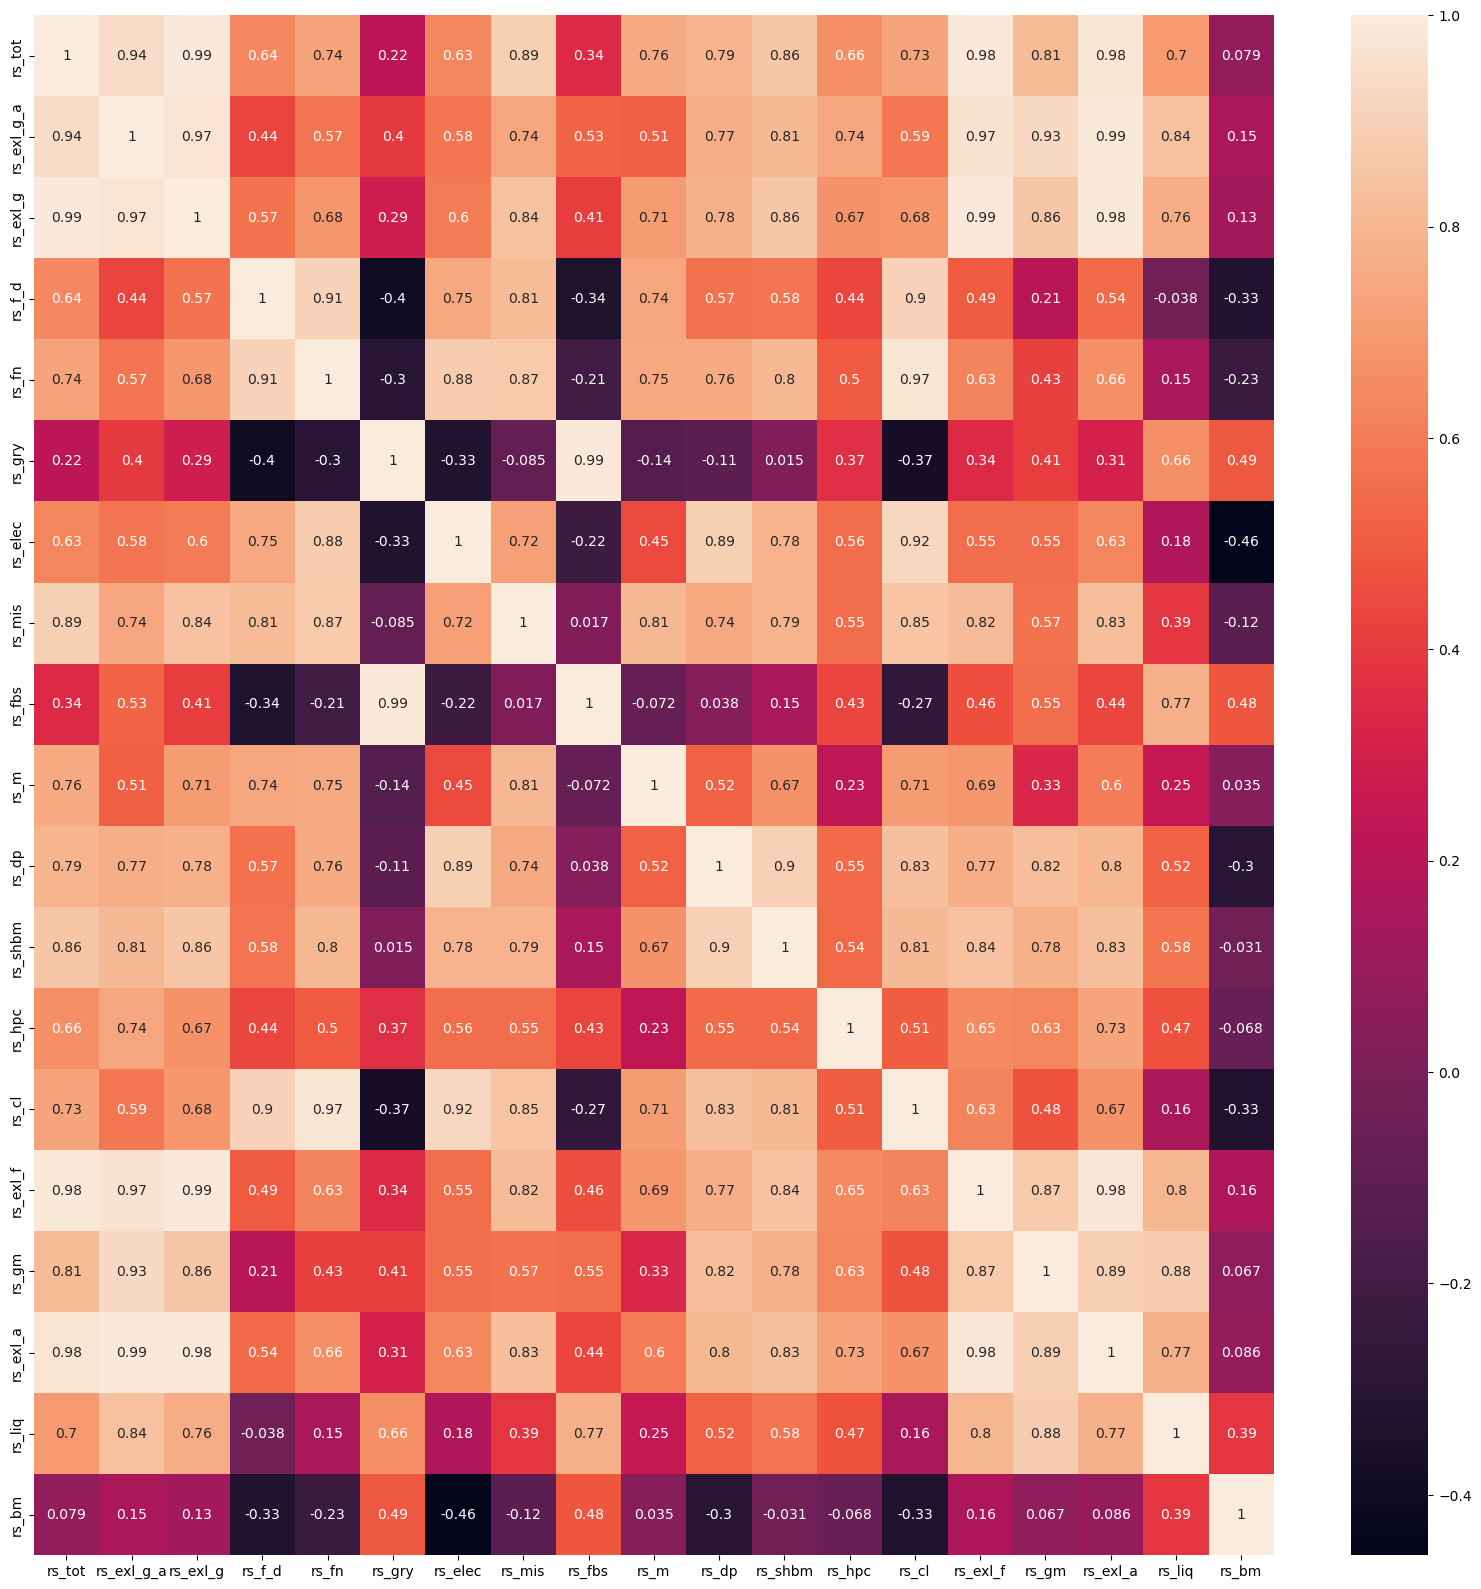

In [26]:
# correlation heatmap 
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(dtMsub.corr(), annot = True)

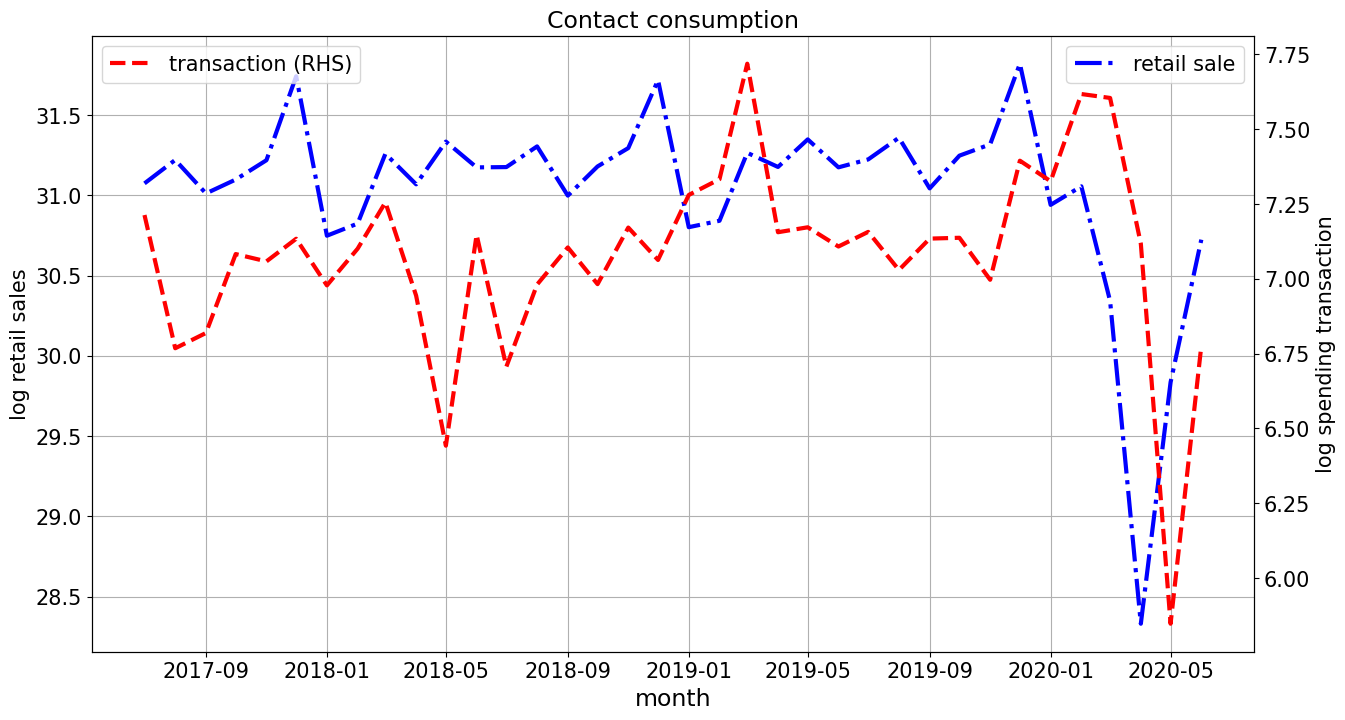

In [31]:
## plot of level of contact sector

fig,ax = plt.subplots(figsize = figsize)
ax2 = ax.twinx()
ax.plot(dtM.index,
        dtM['rs_f_d']+dtM['rs_hpc']+dtM['rs_cl'],          
        'b-.',
       lw = 3,
       label = 'retail sale')
ax.legend(loc = 1,
        fontsize = fontsize)
ax.set_xlabel("month",fontsize = titlesize)
ax.grid()
ax.set_ylabel('log retail sales',fontsize = fontsize)
ax.tick_params(axis='both', 
               which='major',
               labelsize = fontsize)
ax2.plot(dtM.index,
         dtM['total_spend_contact'],
         'r--',
         lw = 3,
         label = 'transaction (RHS)')
ax2.legend(loc = 2,
          fontsize = fontsize)
ax2.set_ylabel('log spending transaction',fontsize = fontsize)
ax2.tick_params(labelsize = fontsize)
#ax.set_title('Retail sales and spending transaction',
#            fontsize = titlesize)
plt.title('Contact consumption',fontsize = titlesize)
plt.savefig('../../graph/retail_level_contact')

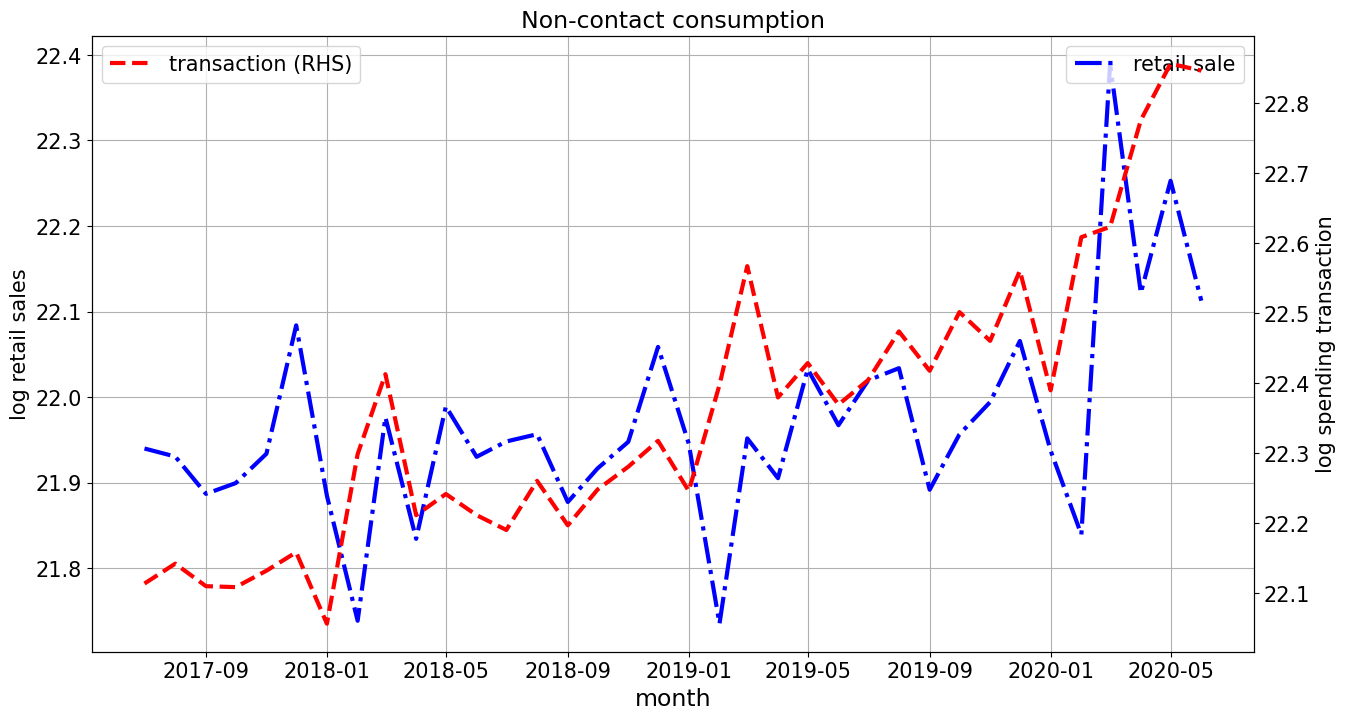

In [32]:
## plot of level of non-contact 

fig,ax = plt.subplots(figsize = figsize)
ax2 = ax.twinx()
ax.plot(dtM.index,
        dtM['rs_gry']+dtM['rs_fbs'],                #dtM['rs_gry']+dtM['rs_fbs']+dtM['rs_mis']+dtM['rs_cl']+dtM['rs_gm']+dtM['rs_hpc']+dtM['rs_shbm']+dtM['rs_liq']+dtM['rs_dp']+dtM['rs_f_d']
        'b-.',
       lw = 3,
       label = 'retail sale')
ax.legend(loc = 1,
        fontsize = fontsize)
ax.set_xlabel("month",fontsize = titlesize)
ax.grid()
ax.set_ylabel('log retail sales',fontsize = fontsize)
ax.tick_params(axis='both', 
               which='major',
               labelsize = fontsize)
ax2.plot(dtM.index,
         dtM['total_spend_non'],
         'r--',
         lw = 3,
         label = 'transaction (RHS)')
ax2.legend(loc = 2,
          fontsize = fontsize)
ax2.set_ylabel('log spending transaction',fontsize = fontsize)
ax2.tick_params(labelsize = fontsize)
#ax.set_title('Retail sales and spending transaction',
#            fontsize = titlesize)
plt.title('Non-contact consumption',fontsize = titlesize)
plt.savefig('../../graph/retail_level_non')

In [33]:
for rs in rs_names:
    print('correlation coefficient in the yoy ')
    print(rs)
    print(dtM[[rs+'_yoy','spend_pc']].corr())

correlation coefficient in the yoy 
rs_tot
            rs_tot_yoy  spend_pc
rs_tot_yoy       1.000    -0.535
spend_pc        -0.535     1.000
correlation coefficient in the yoy 
rs_exl_g_a
                rs_exl_g_a_yoy  spend_pc
rs_exl_g_a_yoy        1.000000 -0.464096
spend_pc             -0.464096  1.000000
correlation coefficient in the yoy 
rs_exl_g
              rs_exl_g_yoy  spend_pc
rs_exl_g_yoy      1.000000 -0.505833
spend_pc         -0.505833  1.000000
correlation coefficient in the yoy 
rs_f_d
            rs_f_d_yoy  spend_pc
rs_f_d_yoy    1.000000 -0.709524
spend_pc     -0.709524  1.000000
correlation coefficient in the yoy 
rs_fn
           rs_fn_yoy  spend_pc
rs_fn_yoy   1.000000 -0.582975
spend_pc   -0.582975  1.000000
correlation coefficient in the yoy 
rs_gry
            rs_gry_yoy  spend_pc
rs_gry_yoy    1.000000  0.520654
spend_pc      0.520654  1.000000
correlation coefficient in the yoy 
rs_elec
             rs_elec_yoy  spend_pc
rs_elec_yoy      1.00000  -0.64347